##Introduction to Logistic Regression
logistic regression is a predictive regression model where the dependent variable is categorical

First lets create some sample data, and plot them.

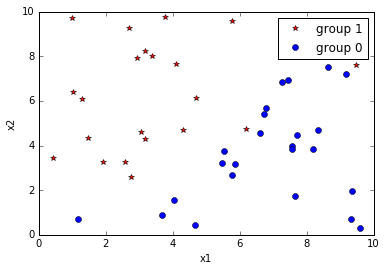

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Select weights and bias values for the decision boundary of our data
w_1=1
w_0=0 #bias term
n=50 # total number of data points
# Create data
x1=np.random.uniform(0,10,n)
x2=np.random.uniform(0,10,n)

#select the category based on our decision boundary and some randome value to introduce some variance to our data

y=np.array([1 if ((x2[i]>(x1[i]*w_1+w_0)) != (np.random.random()>0.9)) else 0 for i in range(n)])

# Plot data

plt.plot(x1[np.where(y==1)], x2[np.where(y==1)], "r*",x1[np.where(y==0)], x2[np.where(y==0)], "o")

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['group 1', 'group 0'],numpoints = 1)
plt.show()

##Logistic Regression

in linear regression our model was 
$$ \begin{bmatrix}x_0 &x_1 \end{bmatrix} \begin{bmatrix}w_0\\w_1\end{bmatrix} =\hat{y}$$

In this model y was a continious variable varying from $-\infty$ to $\infty$

In simplest form of logistic regression output has to be a binary value, one of two categories. We will change our model using logistic function to output a y value between 0 and 1 and then translate it to obtain a binary value.

$$h_w(x)=g(xw^T)$$
where, sigmoid function:
$$g(z)=\frac{1}{1+e^{-z}}$$
$h_w(x)$ is traslated in to binary output using.
$$h_w(x)\geq 0.5 \rightarrow y=1$$
$$h_w(x)< 0.5 \rightarrow y=0$$

This can also be written as:

$$xw^T\geq 0 \rightarrow y=1$$
$$xw^T < 0 \rightarrow y=0$$

###Cost function
Cost function for logistic regression is given below.
$$\begin{equation}
\begin{split}
J(w)& = \frac{1}{m}\sum_{i=1}^{m}cost(h_w(x^i),y^i)\\
cost(h_w(x),y) & = -log(h_w(x)) \qquad y=1\\
cost(h_w(x),y) & = -log(1-h_w(x)) \qquad y=0
\end{split}
\end{equation}$$


Cost function can be combined as follows:

$$cost(h_w(x),y)=-y \, log(h_w(x))-(1-y)\, log(1-h_w(x))$$

The cost function can be miinimized using gradient descent. Gradient descent update rule:

$$ w_j=w_j-\alpha \frac{\partial J(w)}{\partial w_j}$$

Partial derivative of the cost function is given below.
$$\frac{\partial J(w)}{\partial w_j}=\frac{1}{m}\sum_{i=1}^{m}\left [ h_w(x^i)-y^i \right ] x_j^i$$

##Logistic regression for our sample dataset using gradient descent

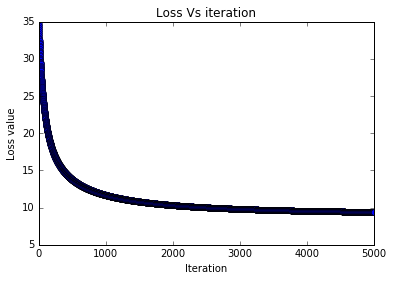

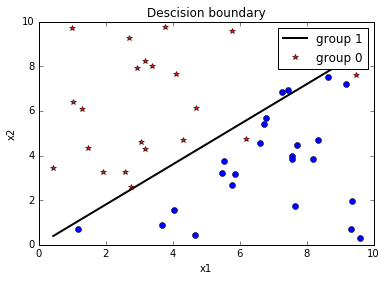

In [2]:
X=np.matrix(np.column_stack(([1]*len(x1),x1,x2)))
Y=np.matrix(y)
w=np.matrix([0]*np.shape(X)[1]).T
loss=[]
ite_num=5000
alpha=0.0001
m=len(Y)
# print np.shape(X)
# print np.shape(Y)
# print np.shape(w)
def sigm(x):
    return 1/(1+np.exp(-x))
def loss_fn(w):
    H=sigm(X*w)
    return [-Y*np.log(H)-(1-Y)*np.log(1-H)][0].item()
loss.append(loss_fn(w))
np.shape(alpha/m*((sigm(X*w).T-Y)*X))
for i in range(ite_num):
    w=w-alpha/m*((sigm(X*w).T-Y)*X).T
    loss.append(loss_fn(w))

plt.plot(range(ite_num+1),loss,'o')
plt.xlabel('Iteration')
plt.ylabel('Loss value')
plt.title('Loss Vs iteration')
plt.show() 

min_val=X[:,1].min()
max_val=X[:,1].max()
plt.plot([min_val,max_val] , [(min_val*-1*w[1]/w[2]-w[0]/w[2])[0].item(), (max_val*-1*w[1]/w[2]-w[0]/w[2])[0].item()], 'k-', lw=2)
plt.plot(x1[np.where(y==1)], x2[np.where(y==1)], "r*",x1[np.where(y==0)], x2[np.where(y==0)], "o")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['group 1', 'group 0'],numpoints = 1)
plt.title('Descision boundary')
plt.show()
